In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
stock_symbol = 'YUM'

In [4]:
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-19,94.250000,94.790001,94.099998,94.519997,86.778793,1999800
2019-02-20,94.669998,95.199997,94.360001,94.720001,86.962425,2322300
2019-02-21,94.529999,95.080002,94.129997,94.879997,87.109306,1364400
2019-02-22,95.000000,95.400002,94.489998,95.389999,87.577545,1932100
2019-02-25,95.699997,95.699997,93.180000,93.500000,85.842323,2204500


In [7]:
len(data)

1259

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,130.279999,131.960007,130.279999,131.360001,131.360001,1849000
2024-02-13,130.500000,131.210007,129.789993,131.210007,131.210007,1765700
2024-02-14,131.600006,134.250000,131.429993,134.009995,134.009995,2803100
2024-02-15,134.000000,135.610001,133.869995,135.399994,135.399994,3128200
2024-02-16,135.229996,135.850006,134.399994,134.550003,134.550003,2565900


In [9]:
opn = data[['Open']]

<Axes: xlabel='Date'>

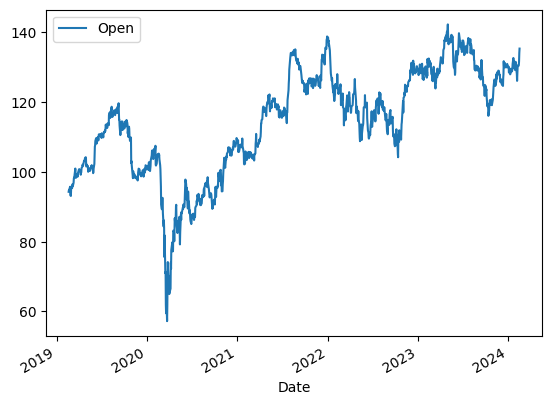

In [10]:
opn.plot()

In [11]:
import matplotlib.pyplot as plt

In [12]:
ds = opn.values

In [13]:
ds

array([[ 94.25      ],
       [ 94.66999817],
       [ 94.52999878],
       ...,
       [131.6000061 ],
       [134.        ],
       [135.22999573]])

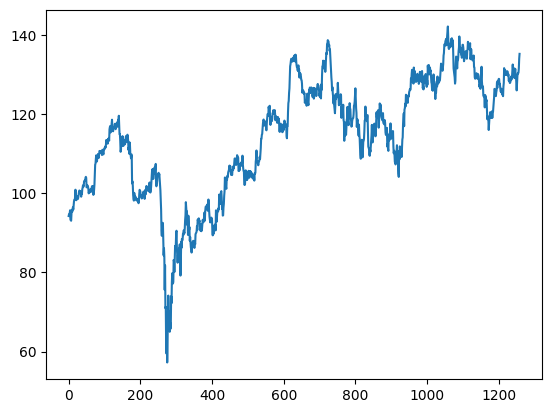

In [14]:
plt.plot(ds)

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [18]:
len(ds_scaled), len(ds)

(1259, 1259)

In [19]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [20]:
train_size,test_size

(881, 378)

In [21]:

ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [22]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [23]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [24]:
X_train.shape,y_train.shape

((780, 100), (780,))

In [25]:
X_test.shape, y_test.shape

((277, 100), (277,))

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 6s 172ms/step - loss: 0.1551 - val_loss: 0.0064
Epoch 2/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0160 - val_loss: 0.0029
Epoch 3/100
13/13 [==============================] - 1s 103ms/step - loss: 0.0096 - val_loss: 0.0210
Epoch 4/100
13/13 [==============================] - 1s 100ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 5/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 6/100
13/13 [==============================] - 1s 115ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 7/100
13/13 [==============================] - 2s 118ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 8/100
13/13 [==============================] - 1s 101ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 9/100
13/13 [==============================] - 2s 150ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 10/100
13/13 [==============================] - 3s 196ms/step - loss: 0.0034 - val_lo

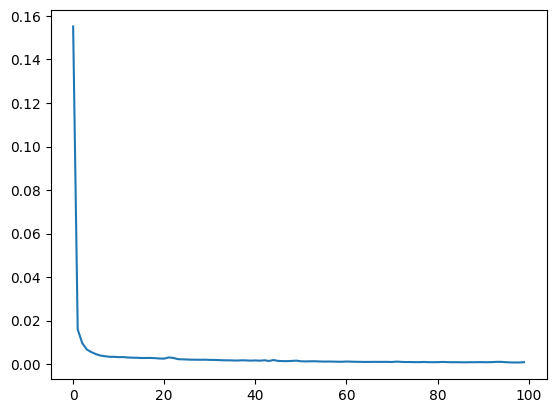

In [30]:
loss = model.history.history['loss']
plt.plot(loss)

In [31]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 20ms/step


In [32]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

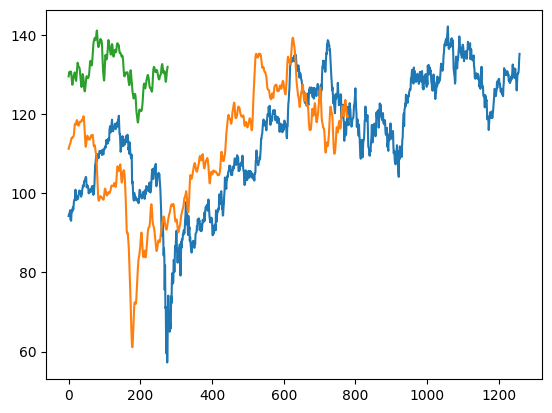

In [33]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [34]:
type(train_predict)

numpy.ndarray

In [35]:
test = np.vstack((train_predict,test_predict))

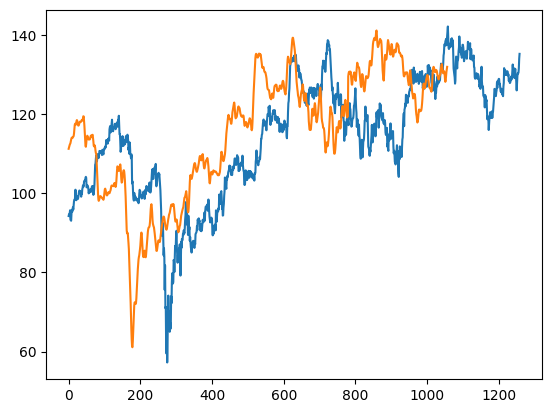

In [36]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [37]:
len(ds_test)

378

In [38]:
fut_inp = ds_test[278:]

In [39]:
fut_inp = fut_inp.reshape(1,-1)

In [40]:
tmp_inp = list(fut_inp)

In [41]:
fut_inp.shape

(1, 100)

In [42]:
tmp_inp = tmp_inp[0].tolist()

In [43]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.9101629257202148], [0.9211731553077698], [0.9279239773750305], [0.932758629322052], [0.9367536902427673], [0.9402547478675842], [0.9433901309967041], [0.9462615251541138], [0.9489660859107971], [0.9515789151191711], [0.9541469216346741], [0.9566873908042908], [0.9591954946517944], [0.9616490006446838], [0.9640182256698608], [0.9662693738937378], [0.968370795249939], [0.9702965617179871], [0.9720280766487122], [0.9735562205314636], [0.974880039691925], [0.9760069251060486], [0.9769511818885803], [0.9777315855026245], [0.9783697724342346], [0.9788891673088074], [0.9793117642402649], [0.9796594977378845], [0.9799509048461914], [0.980201780796051]]


In [44]:
len(ds_scaled)


1259

In [45]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

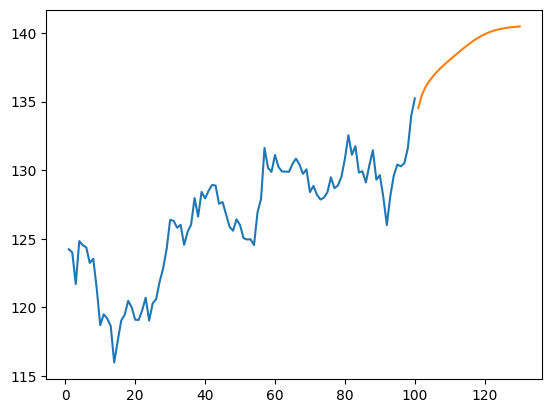

In [46]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1159:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))


In [47]:
ds_new = ds_scaled.tolist()

In [48]:
len(ds_new)


1259

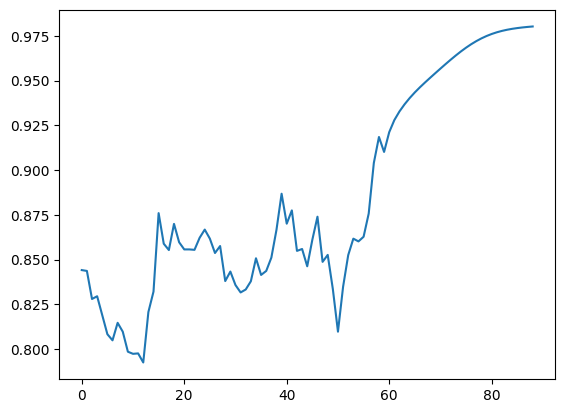

In [49]:
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [50]:
final_graph = normalizer.inverse_transform(ds_new).tolist()


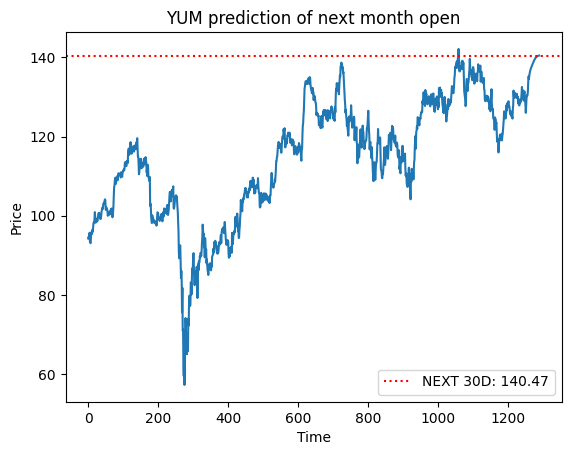

In [51]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [53]:
!pip install tensorflow


In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class KerasLSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, units=50, num_layers=2, activation='linear', optimizer='adam', epochs=100, batch_size=64):
        self.units = units
        self.num_layers = num_layers
        self.activation = activation
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def create_lstm_model(self):
        model = Sequential()
        for i in range(self.num_layers - 1):
            if i == 0:
                model.add(LSTM(units=self.units, return_sequences=True, input_shape=(self.X_train.shape[1], 1)))
            else:
                model.add(LSTM(units=self.units, return_sequences=True))
        model.add(LSTM(units=self.units))
        model.add(Dense(units=1, activation=self.activation))
        model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        return model

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.model = self.create_lstm_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {
            'units': self.units,
            'num_layers': self.num_layers,
            'activation': self.activation,
            'optimizer': self.optimizer,
            'epochs': self.epochs,
            'batch_size': self.batch_size
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

param_grid = {
    'units': [50, 100],
    'num_layers': [2, 3],
    'activation': ['linear', 'relu'],
    'optimizer': ['adam', 'rmsprop']
}

keras_lstm_regressor = KerasLSTMRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=keras_lstm_regressor, param_grid=param_grid, cv=3, scoring=mse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


9/9 [==============================] - 1s 20ms/step


In [66]:
print("Best parameters:", grid_search.best_params_)


Best parameters: {'activation': 'linear', 'num_layers': 2, 'optimizer': 'rmsprop', 'units': 100}
